# Proyecto integrado

## Descripcion del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)


El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


## Instrucciones para completar el proyecto


### Paso 1. Abre el archivo de datos y estudia la informacion general

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

#abrir archivos

df = pd.read_csv('datasets/games.csv')

df.info()

display(HTML('<hr>'))

display(df.head(15))

display(HTML('<hr>'))

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Paso 2. Prepara los datos


- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:
    - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [2]:
#Reemplazar nombres de columnas

df.columns = df.columns.str.lower()
    
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [3]:
#comprobacion de nulos 
print(df.isna().sum())

#comprobacion de duplicados 
print("Duplicados" , df.duplicated().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
Duplicados 0


In [4]:
#Eliminar valores nulos en name y genre
df = df.dropna(subset=['name', 'genre'])

#Convertir 'year_of_release' a int y manejar valores nulos para eliminar .0 y pasar a string

df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
#df['year_of_release'] = df['year_of_release'].replace(0, 'Unknown').astype(str)



#comprobacion de nulos     
print(df.isna().sum())


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [5]:
#convertir calificacion a float
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')

#reemplazar valores en Rating
df['rating'] = df['rating'].fillna('TBD')

#comprobacion de nulos
display('Comprobacion de nulos')
print(df.isna().sum())
display(HTML('<hr>'))
display('comprobacion de tipos de datos')
print(df.dtypes)



'Comprobacion de nulos'

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64


'comprobacion de tipos de datos'

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [6]:
#Calcular ventas totales
#sumar columnas en una nueva

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

display(df.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,TBD,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,TBD,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,TBD,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,TBD,28.31


#### Conclusion paso 2


#### Cambios
Se cambio el tipo de datos de la columna: "year_of_release" de float a int. Este cambio a int se hizo ya que los datos presentaban un punto decimal que en este tipo de datos no tienen razon de ser, se opto manejarlo como tipo entero asi podemos tener la facilidad de realizar comparaciones numericas sobre estos datos que representan el año lanzamiento para poder realizar filtros en operaciones posteriores.

Se cambio los datos de la columna user_score de object a float, Este cambio se hizo para poder trabajar los datos en operaciones matematicas mas adelante, se modifico la cadena tbd a nan ya que esto no nos daba informacion y simplemente iba a entorpecer al momento de hacer operaciones matematicas.

#### Valores nulos

Los valores nulos en las columnas: "critic_score", y "user_score" se matuvieron intactos ya que debido a lo que representan estos datos, modificarlos podria alterar demasiado los resultados en operaciones como el promedio, por ello se opto mejor por simplemente no utilizarlos al momento de hacer este tipo de operaciones.

En las columnas: "name y genre" se eliminaron los datos nulos ya que estos eran muy pocos y no alterarian demasiado los resultados en otras operaciones. Para la columna rating se opto por marcar los datos faltantes con las siglas TBD ya que no podemos tomarlos la libertad de descartarlos ya que eliminar estas filas compromete el resultado en otras operaciones. 

En la columna year of release los valores nulos se reemplazaron por la cadena "Unknown"

#### Suma de total de ventas

Se agrego una nueva columna que representa el total de ventas sumando los datos de las columnas: "na_sales, eu_sales, jp_sales y other_sales" 



### Paso 3. Analiza los datos




- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? - ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

#### Juegos lanzados por año

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_9460\348173818.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(bars.get_xticklabels(), rotation=65, horizontalalignment='right')


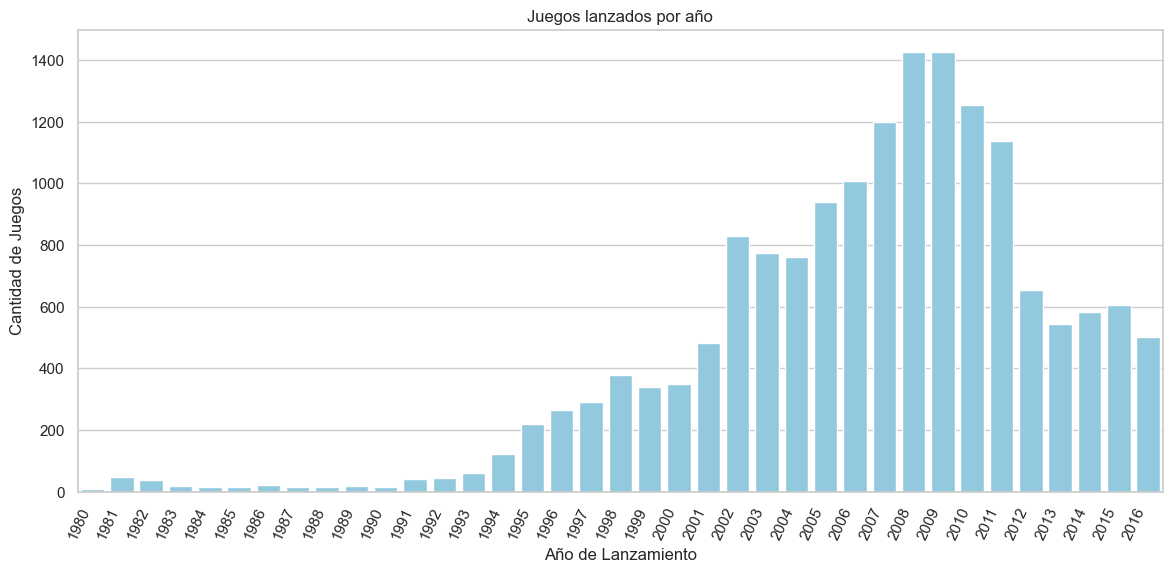

In [7]:
#Numero de juegos por año
filtered_df = df[df['year_of_release'] != 0 ]
games_per_year = filtered_df.groupby(['year_of_release']).size().reset_index(name='games_count')

#grafico de barras 
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))
bars = sns.barplot(x=games_per_year['year_of_release'], y=games_per_year['games_count'].values, color='skyblue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Juegos lanzados por año')
bars.set_xticklabels(bars.get_xticklabels(), rotation=65, horizontalalignment='right')

# Mostrar el gráfico
plt.show()
#Mostrar tabla
#display(games_per_year)

##### Conclusion grafico de barras

La finalidad de este grafico es mostrar una comparacion sobre cuantos juegos han salido en un año con respecto a otros. Al realizar este analisis observamos que de desde los 80 a los 90 la cantidad del juegos lanzados no supera a los 100 juegos, esto podria signicar que el mercado de videojuegos aun era muy selecto y enfocado, a partir de 1994 se observa un cambio significativo con un aumento en la salida de videojuegosm este aumento siguio en los años posteriores. Para 2002 casi se duplica la cantidad de videojuegos y fue en aumento hasta llegar a 2008 que es el año en el que mas videojuegos fueron lanzados y de ahi fue disminuyendo de forma que para en 2016 ya es menos de la mitad de lo que alcanzo este año.

Este aumento en el grafico podria indicar varias cosas, la primera es que los primeros años la industria del videojuego era todavia poco conocida y se consideraba mas selecta, conforme pasa el tiempo fue ganando popularidad haciendo que la cantidad de videojuegos lanzados fuera aumentando de forma drastica en años posteriores. Tambien observamos que si bien hay años que despues disminuyen el numero de lanzamientos de videojuegos pudiera significar mas que esta industria se continua estabilizando ya que podemos ver que se sigue manteniendo una buena cantidad de videojuegos.


#### Ventas por plataforma

In [8]:
sales_per_platform = filtered_df.groupby(filtered_df['platform'])['total_sales'].sum().sort_values(ascending=False)
top_five = sales_per_platform.head(5)

display(top_five)
display(df[df['year_of_release'] == 1985])

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,TBD,40.24
374,Kung Fu,NES,1985,Action,1.64,0.38,1.42,0.06,NaN,NaN,TBD,3.50
869,Soccer,NES,1985,Sports,0.18,0.23,1.53,0.02,NaN,NaN,TBD,1.96
1262,Ice Climber,NES,1985,Platform,0.46,0.10,0.92,0.02,NaN,NaN,TBD,1.50
1482,Gyromite,NES,1985,Puzzle,0.73,0.16,0.40,0.03,NaN,NaN,TBD,1.32
1971,Tag Team Match M.U.S.C.L.E.,NES,1985,Fighting,0.00,0.00,1.05,0.00,NaN,NaN,TBD,1.05
2011,Bomberman,NES,1985,Puzzle,0.18,0.00,0.85,0.00,NaN,NaN,TBD,1.03
2062,1942,NES,1985,Shooter,0.65,0.14,0.21,0.00,NaN,NaN,TBD,1.00
2252,Balloon Fight,NES,1985,Platform,0.39,0.09,0.43,0.01,NaN,NaN,TBD,0.92
3904,Wrecking Crew,NES,1985,Platform,0.00,0.00,0.51,0.00,NaN,NaN,TBD,0.51


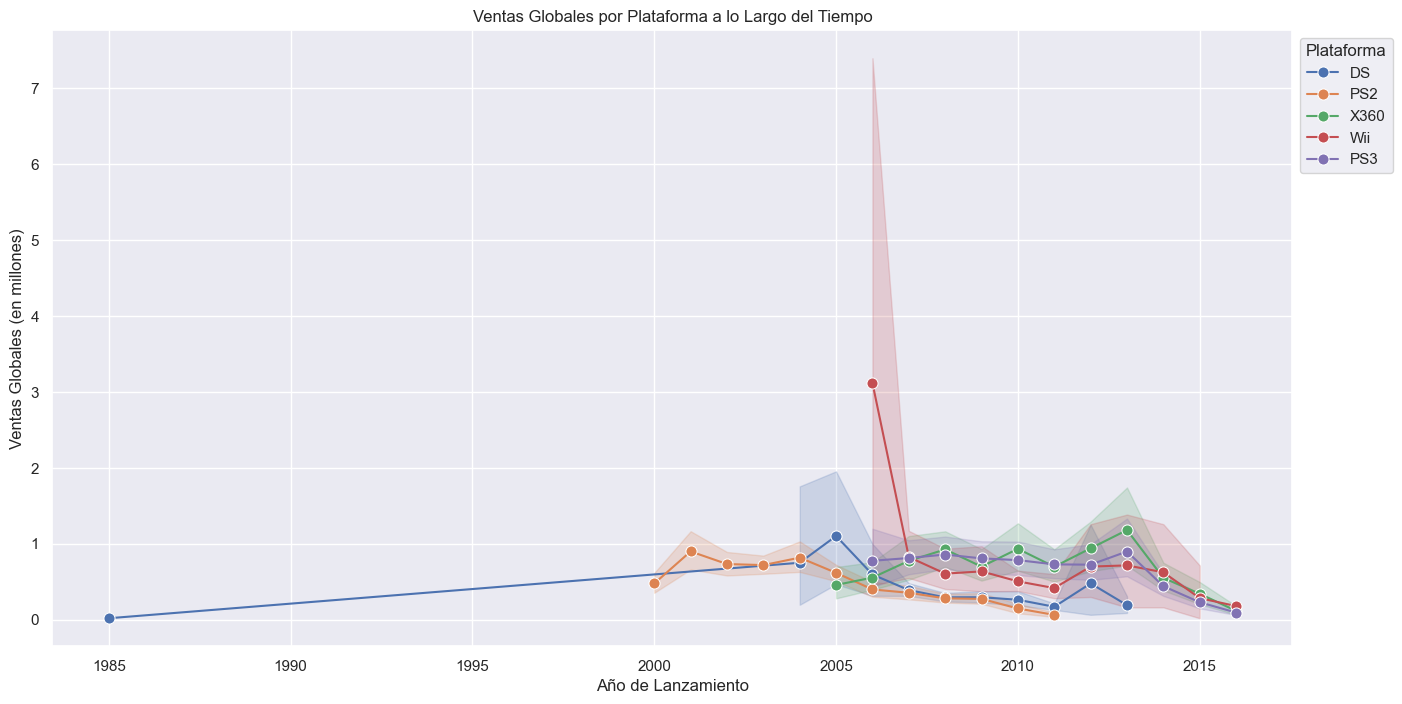

In [9]:

# Seleccionar las plataformas con mayores ventas totales
top_platforms = filtered_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Filtrar el DataFrame para incluir solo las plataformas principales
filtered_df = filtered_df[filtered_df['platform'].isin(top_platforms)]


# Ordenar el DataFrame por año de lanzamiento
filtered_df = filtered_df.sort_values(by='year_of_release')

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico de líneas
plt.figure(figsize=(16, 8))
lines = sns.lineplot(data=filtered_df, x='year_of_release', y='total_sales', hue='platform', marker='o', markersize=8)

# Añadir etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Globales (en millones)')
plt.title('Ventas Globales por Plataforma a lo Largo del Tiempo')

# Mostrar el gráfico
plt.legend(title='Plataforma', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
